In [1]:
# 캐글 -> penguins_size.csv 파일 다운로드 받아 실습
# 어떤 종류의 펭귄일까?
import pandas as pd
df = pd.read_csv('./input/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
df.info() # 데이터 기초정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
# 데이터 통계량
df.describe(include='all').T # T(행렬전치 -> 보기 편하게)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
culmen_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,334,3,MALE,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 성별 unique가 3이므로 성별 속성의 고유한 값을 확인
print(df['sex'].unique()) # 'male, female, .'확인완료

# 마침표(.)가 있는 행 확인
df[df['sex'] == '.'] 

['MALE' 'FEMALE' nan '.']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
# 성별에 마침효가 있는 336번째행을 삭제 -> drop() -> 다시 확인
df = df.drop(336) # 잘못된 데이터 삭제

In [7]:
# 결측치 처리 -> 평균값으로
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

df = df.dropna()
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

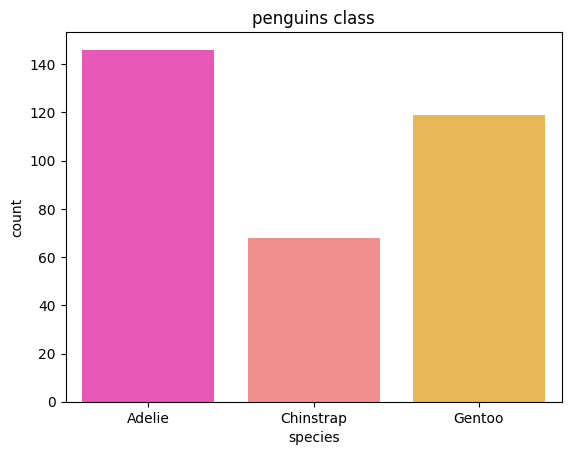

In [8]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='species', data=df, palette='spring', hue='species')
plt.title('penguins class') 
plt.show()

In [9]:
# 펭귄 종의 클래스 개수 파악하기
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

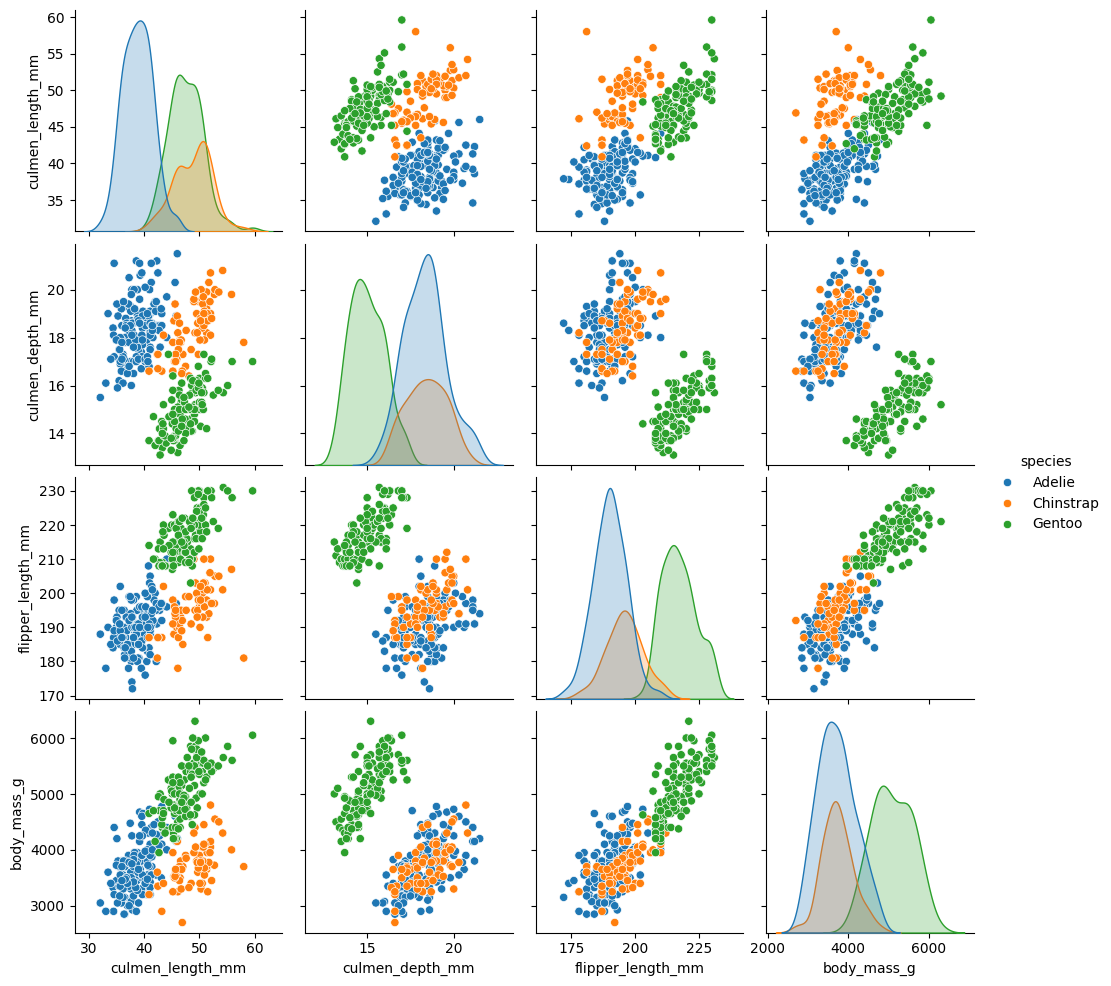

In [10]:
# 속성별 상관관계 분석하기
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df, hue = 'species')

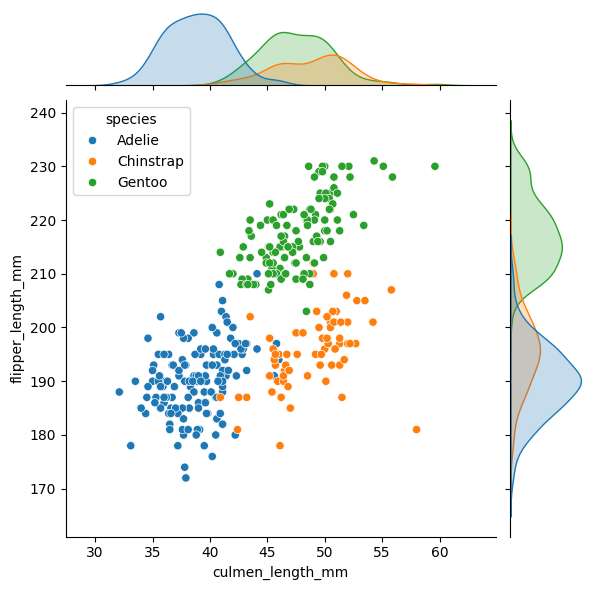

In [11]:
# x, y축명과 그래프 형태로 산점도를 형성
sns.jointplot(x='culmen_length_mm', y='flipper_length_mm', data=df, kind='scatter', hue='species')

In [12]:
# 모델학습을 위한 전처리
# 범주형 데이터(island, sex) --> 원-핫 인코딩
# island(Biscoe, Dream, Torgersen) / sex(FEMALE, MALE)
penguins_encoding = pd.get_dummies(df, columns=['island', 'sex'])
penguins_encoding.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,Adelie,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,Adelie,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,Adelie,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,Adelie,39.3,20.6,190.0,3650.0,False,False,True,False,True


In [13]:
# 독립변수와 종속변수 구분하기
X = penguins_encoding.drop(['species'], axis=1) # species를 제외한 나머지 penguins_encoding
y = penguins_encoding['species'] # species만 추출
# print(X)
print(y)

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object


In [15]:
%pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------------------------ --------------- 6.6/10.7 MB 31.0 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 30.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ------- -------------------------------- 7.1/38.4 MB 36.4 MB/s eta 0:00:01
   -------------- ------------------------- 14.2/38.4 MB 35.6 MB/s eta 0:00:01
   ------------------ --------------------- 17.8/38.4 MB 30.4 MB/s eta 0:00:01
   ----------------------- ---------------- 22.5/38.4 MB 28.5 MB/s eta 0:00:01
   --------------------------- ------------ 26.7/38.4 MB 26.1 MB/s eta 0:00:01
   ---------------------------------- ----- 33.3/38.4 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.4 MB 28.3 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 25.7 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- -

In [16]:
# 훈련 데이터와 테스트 데이터로 분리하기
from sklearn.model_selection import train_test_split

# 훈련용 x, 테스트용 x, 훈련용 y, 테스트용 y = train_test_split(x, y, test_size=, random_state= )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(233, 9) (100, 9) (233,) (100,)


In [17]:
# k-NN 모델 학습하기
from sklearn.neighbors import KNeighborsClassifier

k = 3 # 하이퍼 파라미터
knn = KNeighborsClassifier(n_neighbors=k) # 모델 생성
# 훈련용 데이터를 fit() 함수로 학습시킨다.
knn.fit(X_train, y_train) # 모델 학습

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
# 훈련데이터로 학습한 결과 확인
# knn.score(x, y) -> 0.0 ~ 1.0 
print(knn.score(X_train, y_train)) # 정확도 

0.9055793991416309


In [19]:
# 테스트하기 -> 훈련에 사용되지 않은 테스트용 독립변수(X_test)를 이용
y_pred = knn.predict(X_test)
y_pred[:20] # 20개까지만 

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie'], dtype=object)

In [20]:
# 평가하기 -> 정확도
print(f'knn accuracy : {knn.score(X_test, y_test)}')

knn accuracy : 0.76


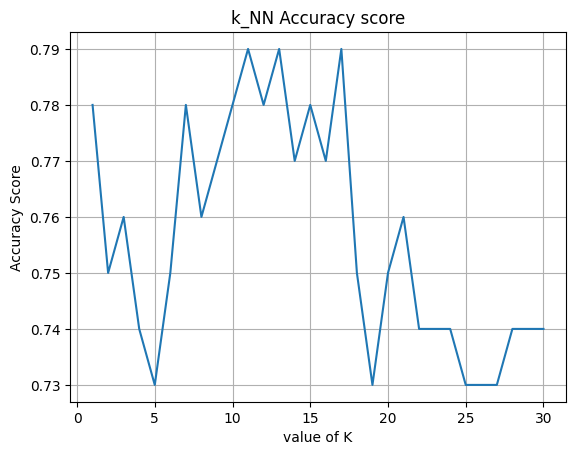

In [21]:
# k값에 따른 성능 비교하기
import numpy as np
import matplotlib.pyplot as plt

k_range = range(1, 31) # k값을 1 ~ 30 으로 설정
scores = [] # k값에 따른 정확도를 저장할 리스트 생성
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) # k=1, 2, ..., 30
    knn.fit(X_train, y_train) # 학습 : fit -> train 
    scores.append(knn.score(X_test, y_test)) # score리스트에 테스트 데이터로 정확도를 산출한 결과 추가

# x축은 k_range, y축은 scores값으로 그래프 작성
plt.plot(k_range, scores) # 꺾은선 그래프
plt.xlabel('value of K')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(0, 31, 5)) # x축에 5단위로 눈금 표시
plt.grid()
plt.title('k_NN Accuracy score')
plt.show()

In [22]:
for value, score in enumerate(scores, start=1):
    print(f'k = {value}일 때 : accuracy : {score:.3f}')

k = 1일 때 : accuracy : 0.780
k = 2일 때 : accuracy : 0.750
k = 3일 때 : accuracy : 0.760
k = 4일 때 : accuracy : 0.740
k = 5일 때 : accuracy : 0.730
k = 6일 때 : accuracy : 0.750
k = 7일 때 : accuracy : 0.780
k = 8일 때 : accuracy : 0.760
k = 9일 때 : accuracy : 0.770
k = 10일 때 : accuracy : 0.780
k = 11일 때 : accuracy : 0.790
k = 12일 때 : accuracy : 0.780
k = 13일 때 : accuracy : 0.790
k = 14일 때 : accuracy : 0.770
k = 15일 때 : accuracy : 0.780
k = 16일 때 : accuracy : 0.770
k = 17일 때 : accuracy : 0.790
k = 18일 때 : accuracy : 0.750
k = 19일 때 : accuracy : 0.730
k = 20일 때 : accuracy : 0.750
k = 21일 때 : accuracy : 0.760
k = 22일 때 : accuracy : 0.740
k = 23일 때 : accuracy : 0.740
k = 24일 때 : accuracy : 0.740
k = 25일 때 : accuracy : 0.730
k = 26일 때 : accuracy : 0.730
k = 27일 때 : accuracy : 0.730
k = 28일 때 : accuracy : 0.740
k = 29일 때 : accuracy : 0.740
k = 30일 때 : accuracy : 0.740


In [23]:
# 모델 성능 개선하기 - 스케일링
# 최소 최대 정규화
import numpy as np

height = [100, 120, 160, 180]
weight = [20, 30, 50, 70]
print(np.min(height), np.max(height))
print(np.min(weight), np.max(weight))

for x in height:
    print((x - np.min(height))/(np.max(height) - np.min(height)), end =' ')
print()
for x in weight:
    print((x - np.min(weight))/(np.max(weight) - np.min(weight)), end=' ')

100 180
20 70
0.0 0.25 0.75 1.0 
0.0 0.2 0.6 1.0 

In [24]:
# 표준화
# 평균, 표준편차
print(np.mean(height), round(np.std(height), 1))
print(np.mean(weight), round(np.std(weight), 1))

for i in height:
    print(round((i - np.mean(height))/np.std(height), 2), end=' ')
print()
for i in weight:
    print(round((i - np.mean(weight))/np.std(weight), 2), end=' ')

140.0 31.6
42.5 19.2
-1.26 -0.63 0.63 1.26 
-1.17 -0.65 0.39 1.43 

In [25]:
# 훈련 데이터 정규화하기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 최소최대정규화 
scaler.fit(X) # 독립변수 정규화 (X의 최솟값을 0, 최댓값을 1로 세팅)
scaled = scaler.transform(X) 
round(pd.DataFrame(scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8
count,333.00,333.00,333.00,333.00,333.00,333.00,333.00,333.0,333.0
mean,0.43,0.48,0.49,0.42,0.49,0.37,0.14,0.5,0.5
std,0.20,0.23,0.24,0.22,0.50,0.48,0.35,0.5,0.5
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
25%,0.27,0.30,0.31,0.24,0.00,0.00,0.00,0.0,0.0
50%,0.45,0.50,0.42,0.38,0.00,0.00,0.00,0.0,1.0
75%,0.60,0.67,0.69,0.58,1.00,1.00,0.00,1.0,1.0
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0


In [26]:
# 정규화한 scaled 변수를 독립변수로 사용
# 훈련용 데이터와 테스트용 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.3, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(233, 9) (100, 9) (233,) (100,)


In [27]:
# 생성 밑 학습하기
from sklearn.neighbors import KNeighborsClassifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
print(knn.score(X_train, y_train))

0.9957081545064378


In [29]:
# 테스트 및 평가
y_pred = knn.predict(X_test)
y_pred[:20]

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie'], dtype=object)

In [30]:
print(f'knn accuracy : {knn.score(X_test, y_test)}')

knn accuracy : 0.98


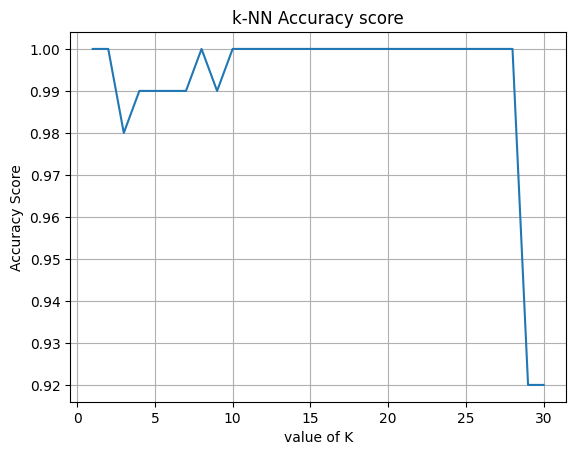

In [31]:
# k값에 따른 성능 비교하기
import numpy as np
import matplotlib.pyplot as plt

k_range = range(1, 31)  # k값을 1부터 30까지의 수로 설정
scores = []  # k값에 따른 정확도를 저장할 리스트 생성(빈 리스트)
# k값 1~30까지 정확도를 산출하여 scores 리스트에 저장
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    # 훈련용 독립변수(X_train)와 훈련용 종속변수(y_train)로 학습
    knn.fit(X_train, y_train)
    # score 리스트에 테스트 데이터로 정확도를 산출한 결과 추가
    scores.append(knn.score(X_test, y_test))

# x축은 k_range값, y축은 scores 값으로 그래프 작성
plt.plot(k_range, scores)    
plt.xlabel('value of K')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(0, 31, 5)) # x축에 5단위로 눈금 표시
plt.grid()
plt.title('k-NN Accuracy score')
plt.show()

In [32]:
for value, score in enumerate(scores, start=1):
    print(f'k = {value}일 때 : accuracy :{score:.3f}')

k = 1일 때 : accuracy :1.000
k = 2일 때 : accuracy :1.000
k = 3일 때 : accuracy :0.980
k = 4일 때 : accuracy :0.990
k = 5일 때 : accuracy :0.990
k = 6일 때 : accuracy :0.990
k = 7일 때 : accuracy :0.990
k = 8일 때 : accuracy :1.000
k = 9일 때 : accuracy :0.990
k = 10일 때 : accuracy :1.000
k = 11일 때 : accuracy :1.000
k = 12일 때 : accuracy :1.000
k = 13일 때 : accuracy :1.000
k = 14일 때 : accuracy :1.000
k = 15일 때 : accuracy :1.000
k = 16일 때 : accuracy :1.000
k = 17일 때 : accuracy :1.000
k = 18일 때 : accuracy :1.000
k = 19일 때 : accuracy :1.000
k = 20일 때 : accuracy :1.000
k = 21일 때 : accuracy :1.000
k = 22일 때 : accuracy :1.000
k = 23일 때 : accuracy :1.000
k = 24일 때 : accuracy :1.000
k = 25일 때 : accuracy :1.000
k = 26일 때 : accuracy :1.000
k = 27일 때 : accuracy :1.000
k = 28일 때 : accuracy :1.000
k = 29일 때 : accuracy :0.920
k = 30일 때 : accuracy :0.920
